<a href="https://colab.research.google.com/github/RafaGusmao/Data-Science-Fake-News-Classifier/blob/main/Fake_News_Classifier_with_TensorFlow_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Classifier

We live in the digital age, where information is more accessible than ever, and we continue to become more and more accessible, in a more agile and broad way.

Despite the benefits this brings, there are also problems and risks with it. Here, let's worry about one of the biggest of them: ***Fake News***
<p align=center>
  <img src="https://image.freepik.com/free-photo/woman-reading-newspaper_53876-13446.jpg" height="30%">
</p>

You've certainly come across one of these. In an age of information, misinformation ends up being our biggest problem.

In short, ***Fake News*** is Fake News. They can range from a different number in a presented statistic, to news of a completely false event.



## How does this influence our lives?

As usual, we tend to believe the big media outlets, or people in our circle of friends who forward us news on social networks. In this way, we create the habit of not checking our sources, and thus, we believe and spread fake news, sometimes without even knowing it.

This becomes a big problem when it affects the result of something important in the common good of our society, such as election results, public opinion on certain projects, public policies, and even public people, whether they are from the political, artistic, journalistic, or any other.

## The Project

Nowadays, we can count on tools that help us identify and filter fake news. With *Machine Learninr* techniques such as **Neural Networks** this task of sifting through different news sources to discover what is false and what is factual becomes easier.

> The objective of the project is to train a model that is capable of classifying news, with the best possible accuracy, as false or factual.

To do this, we will use the ***Tensorflow*** library to train Neural Networks to do this work for us.

In [1]:
# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

# configuring the notebook
np.random.seed(42)
sns.set_style()

# filter warning messages
import warnings
warnings.filterwarnings('ignore')


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
df_test= pd.read_csv('/content/test.csv')
df_submit = pd.read_csv('/content/submit.csv')
df_train= pd.read_csv('/content/train.csv')

# Merge datasets based on a common column (e.g. 'id')
df_merge = pd.merge(df_test, df_submit, on='id')

# Display the first rows of the combined dataset
df_merge.head()


,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [3]:
# Concatenate the datasets (add lines)
df = pd.concat([df_train, df_merge], ignore_index=True)

# Display the first rows of the combined dataset
print(df.shape)
df.head()

(26000, 5)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### The Data
Our dataset has almost 26 thousand rows and 5 columns, of which we have:

* `title` - Title of the news
* `text` - News text
* `author` - Author of the news
* `label` which is our target variable and is divided into:
  * True (Factual) = 0
  * Fake = 1

### Processing Data

Here, we are dealing with our natural language in string format, so we need some NLP knowledge to handle this data in the best way, so that it can be passed to our model successfully, and thus, we obtain the results we want. .

In [4]:
# dealing with news text
import string
def clean_text(text):
    words = str(text).split()
    words = [i.lower() + " " for i in words]
    words = " ".join(words)
    words = words.translate(words.maketrans('', '', string.punctuation))
    return words

df['text'] = df['text'].apply(clean_text)
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide we didn’t even see comey...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,ever get the feeling your life circles ...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,why the truth might get you fired octob...,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos 15 civilians killed in single us ...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print an iranian woman has been sentence...,1


Now, what we need is to separate our data into training, validation and testing, so that we can continue on the path that leads us to the model.

In [5]:
# separating the datasets into training, validation and testing
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)
train, validation = train_test_split(train, test_size = 0.2)
print('Inputs by Dataset')
print('Training dataset: ',len(train), 'lines.')
print('Validation Dataset: ', len(validation), 'lines.')
print('Test Dataset: ', len(test), 'lines.')

Inputs by Dataset
Training dataset:  15600 lines.
Validation Dataset:  3900 lines.
Test Dataset:  6500 lines.


### String Pre-Processing - NLP

Here in this project we are focusing on ***Deep Learning*** and the implementation of **Neural Networks**, so we will not expand on String preprocessing.

Anyway, this is an important point of the project. Here, basically what we want is to simplify the text, so that it is easier for our model to process and understand. Therefore, we will use a technique called ***Tokenizing***.

In short, Tokenizing, is a step that separates long string texts into pieces of shorter texts, called tokens.

<p align=center>
  <img src="https://www.kdnuggets.com/wp-content/uploads/text-tokens-tokenization-manning.jpg" height="30%">
</p>


In [6]:
# preparing data for the model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
trunc_type = "post"
pad_type = "post"
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train.text)
word_index = tokenizer.word_index

# applying tokenizing and padding techniques
training_sequences = tokenizer.texts_to_sequences(np.array(train.text))
training_padded = pad_sequences(training_sequences,truncating=trunc_type, padding=pad_type)

max_length = len(training_padded[0])

validation_sequences = tokenizer.texts_to_sequences(np.array(validation.text))
validation_padded = pad_sequences(validation_sequences, padding=pad_type, truncating=trunc_type, maxlen = max_length)

# creating arrays with inputs
x_train = np.copy(training_padded)
x_val = np.copy(validation_padded)
y_train = train['label'].values
y_val = validation['label'].values

In [7]:
# checking the size of arrays
print('Array Size')
print('Train: ', len(x_train), 'lines.')
print('Answers: ', len(y_train), 'lines.')

Array Size
Train:  15600 lines.
Answers:  15600 lines.


### Preparing, Instantiating and Training the Model

Now that our data is ready, it's time to get down to business.

A RandomSearch was carried out to find the best parameters, in a slow process external to this notebook, and a model was instantiated that uses the best parameters found.

In [8]:
# instantiating and fitting the model
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, (155), input_length=max_length),
        tf.keras.layers.Conv1D(16, 5, activation='relu'),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])

model.compile(loss='binary_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                      metrics=['accuracy'])
history = model.fit(x_train, y_train, verbose = 2, epochs = 3, validation_data = (x_val, y_val),
                   callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=6)])

Epoch 1/3
488/488 - 69s - 141ms/step - accuracy: 0.8506 - loss: 0.3761 - val_accuracy: 0.8979 - val_loss: 0.2908
Epoch 2/3
488/488 - 58s - 118ms/step - accuracy: 0.9147 - loss: 0.2415 - val_accuracy: 0.9010 - val_loss: 0.2838
Epoch 3/3
488/488 - 83s - 170ms/step - accuracy: 0.9417 - loss: 0.1619 - val_accuracy: 0.8985 - val_loss: 0.2974


The results are very promising, although they require further investigation. However, it fulfilled the objective of demonstrating the power of Neural Networks.

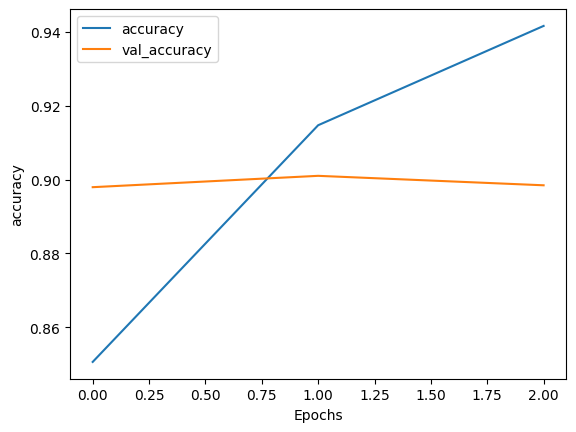

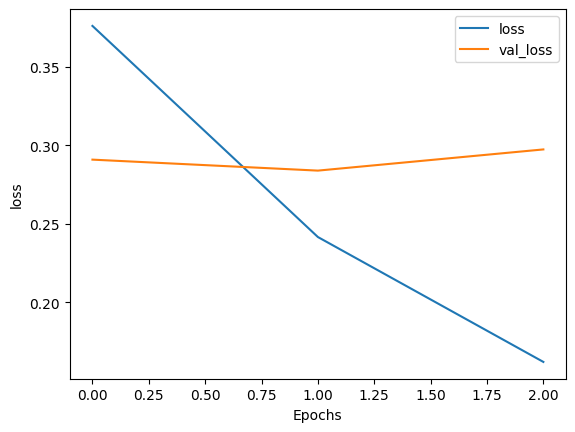

In [9]:
# viewing the results
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Making Predictions on the Test Set

Finally, we have the ideal pipeline to process our data, we have already trained, tuned it and obtained excellent results on our validation set. Our model is ready, but it has one more mission to accomplish.

Let's present it with completely new data, make predictions and see how it does.

In [10]:
# processing test data
test_sequences = tokenizer.texts_to_sequences(np.array(test.text))
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen = max_length)

In [11]:
# making predictions
preds = np.round(model.predict(test_padded))

204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step


In [12]:
#checking predictability in the first data from the test set.
test['predict'] = preds
test.head()

,id,title,author,text,label,predict
4148,4148,У генпрокурора Украины нашли дорогую квартиру ...,NaN,0 комментариев 32 поделились скандал разг...,1,1.0
7841,7841,EXCLUSIVE: Inside Venezuela: Starved Families ...,Ben Kew,caracas venezuela — driving through the ...,0,0.0
18898,18898,Watch: Pro-Turkey Protesters Riot in Rotterdam,Jack Montgomery,hundreds of turkish migrants and dual na...,0,0.0
4194,4194,Dispatches from Wolf Country — Kale and Seal L...,Mike Farrell,without intention mike kind fulfills the ...,1,1.0
8409,8409,"Texas County Enacts ""Emergency Paper Ballots"" ...",NaN,texas county enacts emergency paper ballo...,1,1.0


In [13]:
# checking the size of the result
len(preds)

6500

In [14]:
# checking accuracy
acc = np.sum(1 if i==j else 0 for i,j in zip(preds, test["label"].values)) / len(test)
print("Accuracy: ", acc )

Accuracy:  0.8992307692307693


# Conclusion

Our deep learning model proved to be effective in its proposal. With an accuracy of almost 90%, the model tends to accurately predict possible fake news published. We do not use any bias or any type of biased data in our project, which brings a certain relevance and security to the classification as fake news or not.